In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_excel(r"Data_train.xlsx")
test = pd.read_excel(r"Test_set.xlsx")

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.shape

(10683, 11)

In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
test.shape

(2671, 10)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Converting object data type to datetime dtype

In [8]:
train['Journey_date'] = pd.to_datetime(train['Date_of_Journey'],format = '%d/%m/%Y').dt.day

In [9]:
train['Journey_month'] = pd.to_datetime(train['Date_of_Journey'],format = '%d/%m/%Y').dt.month

In [10]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
#For departure time

train['Dep_hour'] = pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_min'] = pd.to_datetime(train['Dep_Time']).dt.minute

In [12]:
train['Dep_hour'].value_counts()

9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_hour, dtype: int64

In [13]:
train.drop(["Dep_Time",'Arrival_Time'], axis = 1, inplace = True)

In [14]:
train.drop('Additional_Info', axis =1, inplace =True)

In [15]:
train.drop('Route', axis =1, inplace =True)

In [16]:
train_day = pd.to_datetime(train['Date_of_Journey'],format = '%d/%m/%Y').dt.date

In [17]:
day = []
for r in train_day:
    r = pd.Timestamp(r).dayofweek
    day.append(r)

In [18]:
len(day)

10683

In [19]:
train['Day'] = day

In [20]:
train

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Day
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,6
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,2
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,6
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,6
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,19,55,1
10679,Air India,27/04/2019,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,20,45,5
10680,Jet Airways,27/04/2019,Banglore,Delhi,3h,non-stop,7229,27,4,8,20,5
10681,Vistara,01/03/2019,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,11,30,4


In [21]:
#NOTE : This method is not much helpful for tree based regressors like Decision trees, Random Forests, Catboost, XGboost, etc

#Converting the cyclic day data in cosine and sine
train['Day_sin'] = np.sin(2 * np.pi * train['Day']/6)
train['Day_cos'] = np.cos(2 * np.pi * train['Day']/6)

In [22]:
train['Day_sin'].value_counts(), train['Day_cos'].value_counts(),

( 8.660254e-01    2079
  0.000000e+00    1850
  1.224647e-16    1832
 -8.660254e-01    1670
 -2.449294e-16    1474
 -8.660254e-01     909
  8.660254e-01     869
 Name: Day_sin, dtype: int64,
  1.0    3324
  0.5    2539
 -0.5    2079
 -1.0    1832
 -0.5     909
 Name: Day_cos, dtype: int64)

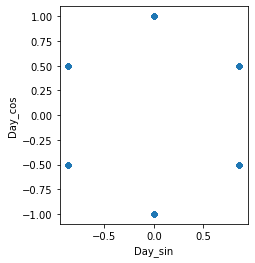

In [23]:
train.plot.scatter('Day_sin', 'Day_cos').set_aspect('equal')

In [24]:
train.drop(['Date_of_Journey', 'Day','Duration'], axis =1, inplace = True)

# Handling categorical data

In [25]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [26]:
train

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Day_sin,Day_cos
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,-2.449294e-16,1.0
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,8.660254e-01,-0.5
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,-2.449294e-16,1.0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,-2.449294e-16,1.0
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,16,50,-8.660254e-01,-0.5
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,4107,9,4,19,55,8.660254e-01,0.5
10679,Air India,Kolkata,Banglore,0.0,4145,27,4,20,45,-8.660254e-01,0.5
10680,Jet Airways,Banglore,Delhi,0.0,7229,27,4,8,20,-8.660254e-01,0.5
10681,Vistara,Banglore,New Delhi,0.0,12648,1,3,11,30,-8.660254e-01,-0.5


<AxesSubplot:xlabel='Airline', ylabel='Price'>

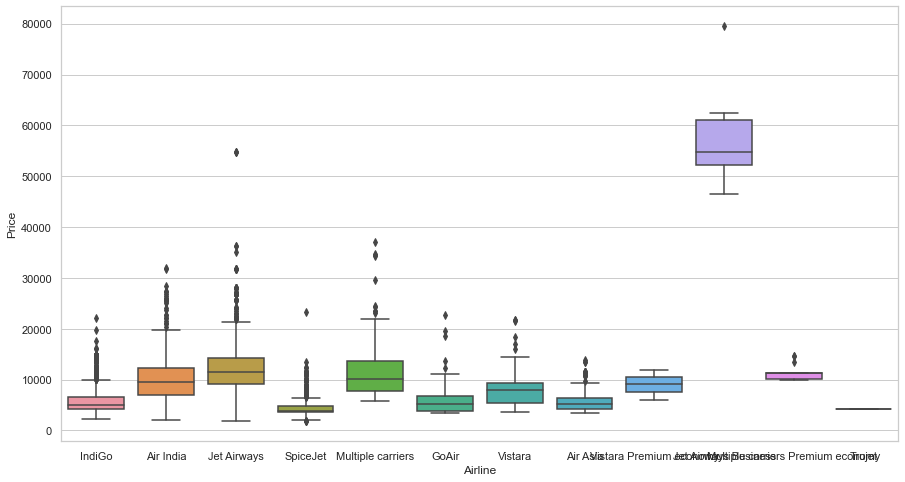

In [27]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.boxplot(x=train["Airline"], y = train["Price"])

In [28]:
train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [29]:
#Since jet airways are no more opertaional
train.drop(train[train['Airline']=='Jet Airways'].index, inplace = True)
train.drop(train[train['Airline']=='Jet Airways Business'].index, inplace = True)
train.drop(train[train['Airline']=='Trujet'].index, inplace = True)

In [30]:
train.shape

(6827, 11)

In [31]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0


In [32]:
train["Source"].value_counts()

Delhi       2949
Kolkata     1615
Banglore    1405
Mumbai       477
Chennai      381
Name: Source, dtype: int64

In [33]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [34]:
train["Destination"].value_counts()

Cochin       2949
Banglore     1615
Delhi         895
New Delhi     510
Hyderabad     477
Kolkata       381
Name: Destination, dtype: int64

In [35]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.tail()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10677,0,1,0,0,0
10678,0,0,0,0,0
10679,0,0,0,0,0
10681,0,0,0,0,1
10682,1,0,0,0,0


In [36]:
Destination.shape

(6827, 5)

In [37]:
train = pd.concat([train, Airline, Source, Destination], axis = 1)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6827 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline                                    6827 non-null   object 
 1   Source                                     6827 non-null   object 
 2   Destination                                6827 non-null   object 
 3   Total_Stops                                6826 non-null   float64
 4   Price                                      6827 non-null   int64  
 5   Journey_date                               6827 non-null   int64  
 6   Journey_month                              6827 non-null   int64  
 7   Dep_hour                                   6827 non-null   int64  
 8   Dep_min                                    6827 non-null   int64  
 9   Day_sin                                    6827 non-null   float64
 10  Day_cos                

In [39]:
train.drop(['Airline','Source','Destination'], axis =1 , inplace = True)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6827 entries, 0 to 10682
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                6826 non-null   float64
 1   Price                                      6827 non-null   int64  
 2   Journey_date                               6827 non-null   int64  
 3   Journey_month                              6827 non-null   int64  
 4   Dep_hour                                   6827 non-null   int64  
 5   Dep_min                                    6827 non-null   int64  
 6   Day_sin                                    6827 non-null   float64
 7   Day_cos                                    6827 non-null   float64
 8   Airline_Air India                          6827 non-null   uint8  
 9   Airline_GoAir                              6827 non-null   uint8  
 10  Airline_IndiGo         

In [41]:
train.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Day_sin,Day_cos,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,22,20,-2.449294e-16,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,5,50,8.660254e-01,-0.5,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,6218,12,5,18,5,-2.449294e-16,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,16,50,-8.660254e-01,-0.5,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,3873,24,6,9,0,0.000000e+00,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Test data

In [42]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [44]:
test.shape

(2671, 10)

In [45]:
#Journey_day
test["Journey_day"] = pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day
test["Journey_month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_day = pd.to_datetime(test['Date_of_Journey'],format = '%d/%m/%Y').dt.date
day = []
for r in test_day:
    r = pd.Timestamp(r).dayofweek
    day.append(r)
test['Day'] = day
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
test.drop(["Duration"], axis = 1, inplace = True)


test['Day_sin'] = np.sin(2 * np.pi * test['Day']/6)
test['Day_cos'] = np.cos(2 * np.pi * test['Day']/6)

In [46]:
test['Day_sin'].value_counts(), test['Day_cos'].value_counts()

( 8.660254e-01    542
  0.000000e+00    457
  1.224647e-16    451
 -8.660254e-01    427
 -2.449294e-16    375
 -8.660254e-01    212
  8.660254e-01    207
 Name: Day_sin, dtype: int64,
  1.0    832
  0.5    634
 -0.5    542
 -1.0    451
 -0.5    212
 Name: Day_cos, dtype: int64)

In [47]:
test.drop(['Route','Additional_Info','Day'], axis=1 , inplace=True)
test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Day_sin,Day_cos
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,1.224647e-16,-1.0
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,-2.449294e-16,1.0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,8.660254e-01,0.5
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,8.660254e-01,0.5
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,0.000000e+00,1.0


In [48]:
#Since jet airways are no more opertaional
test.drop(test[test['Airline']=='Jet Airways'].index, inplace = True)
test.drop(test[test['Airline']=='Jet Airways Business'].index, inplace = True)
test.drop(test[test['Airline']=='Trujet'].index, inplace = True)

In [49]:
test['Airline'].value_counts()

IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Name: Airline, dtype: int64

In [50]:
# Categorical data

# Replacing Total_Stops
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

Airline = test[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Source = test[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Destination = test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)


# Concatenate dataframe --> test_data + Airline + Source + Destination
test = pd.concat([test, Airline, Source, Destination], axis = 1)
test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Day_sin,Day_cos,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,-2.449294e-16,1.0,...,0,0,0,1,0,0,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,8.660254e-01,0.5,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,0.000000e+00,1.0,...,0,0,0,0,0,0,1,0,0,0
6,Air India,Banglore,New Delhi,1,12,3,7,30,8.660254e-01,0.5,...,0,0,0,0,0,0,0,0,0,1
7,IndiGo,Kolkata,Banglore,1,1,5,15,15,8.660254e-01,-0.5,...,0,0,0,1,0,0,0,0,0,0


In [51]:
test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 1 to 2670
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                1772 non-null   int64  
 1   Journey_day                                1772 non-null   int64  
 2   Journey_month                              1772 non-null   int64  
 3   Dep_hour                                   1772 non-null   int64  
 4   Dep_min                                    1772 non-null   int64  
 5   Day_sin                                    1772 non-null   float64
 6   Day_cos                                    1772 non-null   float64
 7   Airline_Air India                          1772 non-null   uint8  
 8   Airline_GoAir                              1772 non-null   uint8  
 9   Airline_IndiGo                             1772 non-null   uint8  
 10  Airline_Multiple carrier

# Feature Selection

In [53]:
train.dropna(inplace = True)

In [54]:
train.isnull().sum()

Total_Stops                                  0
Price                                        0
Journey_date                                 0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Day_sin                                      0
Day_cos                                      0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Cochin                           0
Destination_D

In [55]:
y = train.pop('Price')

In [56]:
X = train

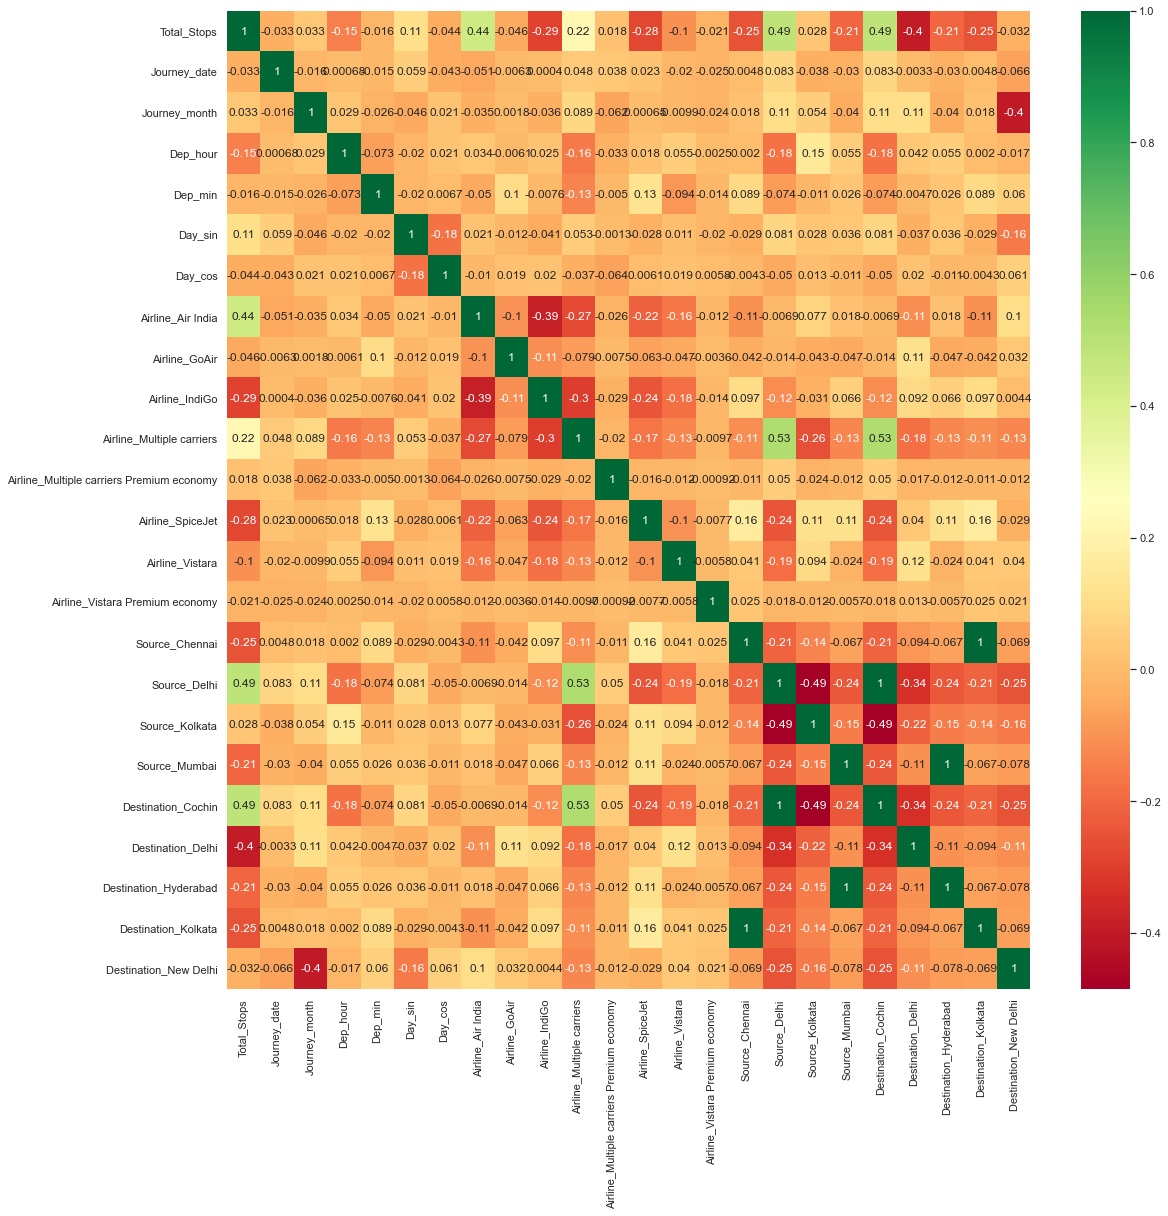

In [57]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [58]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

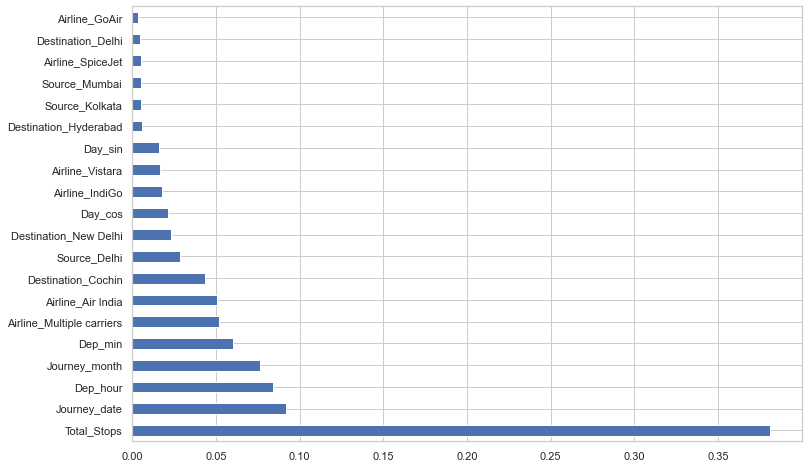

In [59]:
#plot graph of feature importances

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Model Training

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train,y_train)

Learning rate set to 0.052798
0:	learn: 3739.1802858	total: 187ms	remaining: 3m 6s
1:	learn: 3628.2638612	total: 198ms	remaining: 1m 38s
2:	learn: 3535.6479542	total: 204ms	remaining: 1m 7s
3:	learn: 3437.3720506	total: 211ms	remaining: 52.5s
4:	learn: 3338.9638283	total: 216ms	remaining: 42.9s
5:	learn: 3245.1116854	total: 222ms	remaining: 36.8s
6:	learn: 3156.4868390	total: 227ms	remaining: 32.2s
7:	learn: 3079.5563306	total: 231ms	remaining: 28.6s
8:	learn: 3003.7638735	total: 235ms	remaining: 25.9s
9:	learn: 2933.7127850	total: 239ms	remaining: 23.7s
10:	learn: 2873.8939286	total: 243ms	remaining: 21.9s
11:	learn: 2815.0446224	total: 247ms	remaining: 20.3s
12:	learn: 2756.7212655	total: 251ms	remaining: 19s
13:	learn: 2712.8198637	total: 255ms	remaining: 17.9s
14:	learn: 2665.9022682	total: 258ms	remaining: 17s
15:	learn: 2618.4429201	total: 262ms	remaining: 16.1s
16:	learn: 2582.7608692	total: 267ms	remaining: 15.4s
17:	learn: 2550.3606787	total: 271ms	remaining: 14.8s
18:	learn: 

174:	learn: 1685.4522065	total: 844ms	remaining: 3.98s
175:	learn: 1684.3468858	total: 847ms	remaining: 3.96s
176:	learn: 1682.1061580	total: 850ms	remaining: 3.95s
177:	learn: 1679.7395530	total: 852ms	remaining: 3.94s
178:	learn: 1678.7720024	total: 855ms	remaining: 3.92s
179:	learn: 1677.2410924	total: 858ms	remaining: 3.91s
180:	learn: 1675.9717584	total: 861ms	remaining: 3.89s
181:	learn: 1674.4958771	total: 864ms	remaining: 3.88s
182:	learn: 1672.1883819	total: 875ms	remaining: 3.91s
183:	learn: 1670.7437588	total: 879ms	remaining: 3.9s
184:	learn: 1669.0654776	total: 883ms	remaining: 3.89s
185:	learn: 1668.0157414	total: 887ms	remaining: 3.88s
186:	learn: 1666.5016185	total: 890ms	remaining: 3.87s
187:	learn: 1665.0024802	total: 894ms	remaining: 3.86s
188:	learn: 1663.6272007	total: 898ms	remaining: 3.85s
189:	learn: 1662.2697815	total: 901ms	remaining: 3.84s
190:	learn: 1661.2845431	total: 905ms	remaining: 3.83s
191:	learn: 1660.5092673	total: 909ms	remaining: 3.83s
192:	learn:

353:	learn: 1489.5966782	total: 1.5s	remaining: 2.74s
354:	learn: 1487.9316876	total: 1.5s	remaining: 2.73s
355:	learn: 1487.7110561	total: 1.5s	remaining: 2.72s
356:	learn: 1486.7200226	total: 1.51s	remaining: 2.71s
357:	learn: 1486.1108798	total: 1.51s	remaining: 2.71s
358:	learn: 1485.9100400	total: 1.51s	remaining: 2.7s
359:	learn: 1485.1760526	total: 1.51s	remaining: 2.69s
360:	learn: 1484.5599151	total: 1.52s	remaining: 2.69s
361:	learn: 1483.1409354	total: 1.52s	remaining: 2.68s
362:	learn: 1482.8367277	total: 1.52s	remaining: 2.68s
363:	learn: 1482.2107660	total: 1.53s	remaining: 2.67s
364:	learn: 1481.4913148	total: 1.53s	remaining: 2.67s
365:	learn: 1480.2697938	total: 1.54s	remaining: 2.66s
366:	learn: 1479.7454960	total: 1.54s	remaining: 2.66s
367:	learn: 1479.3480059	total: 1.54s	remaining: 2.65s
368:	learn: 1477.8380019	total: 1.55s	remaining: 2.65s
369:	learn: 1477.4111092	total: 1.55s	remaining: 2.64s
370:	learn: 1476.2784596	total: 1.55s	remaining: 2.64s
371:	learn: 14

534:	learn: 1374.9498751	total: 2.16s	remaining: 1.88s
535:	learn: 1374.0481848	total: 2.16s	remaining: 1.87s
536:	learn: 1373.0960060	total: 2.17s	remaining: 1.87s
537:	learn: 1372.8418249	total: 2.17s	remaining: 1.86s
538:	learn: 1371.5512258	total: 2.17s	remaining: 1.86s
539:	learn: 1371.2797037	total: 2.17s	remaining: 1.85s
540:	learn: 1370.5609831	total: 2.18s	remaining: 1.85s
541:	learn: 1370.3552170	total: 2.18s	remaining: 1.84s
542:	learn: 1370.2250924	total: 2.18s	remaining: 1.84s
543:	learn: 1369.9234273	total: 2.19s	remaining: 1.83s
544:	learn: 1369.3135379	total: 2.19s	remaining: 1.83s
545:	learn: 1368.5132065	total: 2.19s	remaining: 1.82s
546:	learn: 1367.8998262	total: 2.2s	remaining: 1.82s
547:	learn: 1367.1278687	total: 2.2s	remaining: 1.82s
548:	learn: 1366.8832730	total: 2.21s	remaining: 1.81s
549:	learn: 1366.3861755	total: 2.21s	remaining: 1.81s
550:	learn: 1365.9207224	total: 2.21s	remaining: 1.8s
551:	learn: 1364.8243980	total: 2.22s	remaining: 1.8s
552:	learn: 13

718:	learn: 1287.1644911	total: 2.82s	remaining: 1.1s
719:	learn: 1286.8107383	total: 2.82s	remaining: 1.1s
720:	learn: 1286.2469469	total: 2.83s	remaining: 1.09s
721:	learn: 1285.9959778	total: 2.83s	remaining: 1.09s
722:	learn: 1285.6385483	total: 2.83s	remaining: 1.08s
723:	learn: 1285.4431141	total: 2.84s	remaining: 1.08s
724:	learn: 1285.2057201	total: 2.84s	remaining: 1.08s
725:	learn: 1285.0017083	total: 2.84s	remaining: 1.07s
726:	learn: 1284.6200307	total: 2.85s	remaining: 1.07s
727:	learn: 1284.1566703	total: 2.85s	remaining: 1.06s
728:	learn: 1284.1556043	total: 2.85s	remaining: 1.06s
729:	learn: 1283.5528693	total: 2.85s	remaining: 1.06s
730:	learn: 1283.4467946	total: 2.86s	remaining: 1.05s
731:	learn: 1283.1688434	total: 2.86s	remaining: 1.05s
732:	learn: 1282.6886685	total: 2.87s	remaining: 1.04s
733:	learn: 1282.1377175	total: 2.87s	remaining: 1.04s
734:	learn: 1281.7204435	total: 2.87s	remaining: 1.04s
735:	learn: 1281.4328578	total: 2.88s	remaining: 1.03s
736:	learn: 

904:	learn: 1226.7863985	total: 3.47s	remaining: 365ms
905:	learn: 1226.5805019	total: 3.48s	remaining: 361ms
906:	learn: 1226.2829199	total: 3.48s	remaining: 357ms
907:	learn: 1225.7531604	total: 3.48s	remaining: 353ms
908:	learn: 1225.6954968	total: 3.48s	remaining: 349ms
909:	learn: 1225.2777993	total: 3.49s	remaining: 345ms
910:	learn: 1224.9955562	total: 3.49s	remaining: 341ms
911:	learn: 1224.8443064	total: 3.49s	remaining: 337ms
912:	learn: 1224.5297906	total: 3.5s	remaining: 333ms
913:	learn: 1224.0794067	total: 3.5s	remaining: 329ms
914:	learn: 1223.4718311	total: 3.5s	remaining: 325ms
915:	learn: 1223.1956214	total: 3.51s	remaining: 322ms
916:	learn: 1222.9403914	total: 3.51s	remaining: 318ms
917:	learn: 1222.7338158	total: 3.51s	remaining: 314ms
918:	learn: 1222.4639037	total: 3.52s	remaining: 310ms
919:	learn: 1222.2147752	total: 3.52s	remaining: 306ms
920:	learn: 1222.1841319	total: 3.52s	remaining: 302ms
921:	learn: 1221.7985473	total: 3.53s	remaining: 298ms
922:	learn: 1

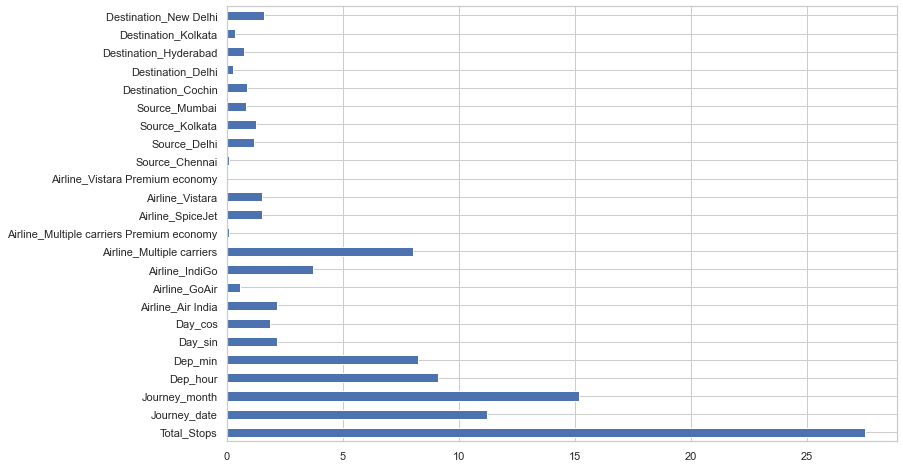

In [69]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [70]:
y_pred = regressor.predict(X_test)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


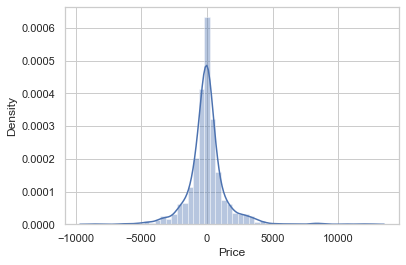

In [71]:
sns.distplot(y_test-y_pred)
plt.show()

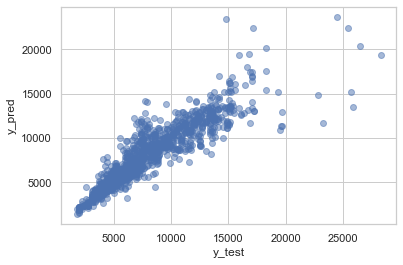

In [72]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [73]:
from sklearn import metrics

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 919.9561017902116
MSE: 2343502.297179163
RMSE: 1530.8501876993591


In [75]:
metrics.r2_score(y_test, y_pred)

0.8417695032405489

# Saving the Model

In [84]:
import pickle
file1 = open('flight-catboost_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file1)

In [85]:
cat_regressor = pickle.load(open('flight-catboost_model.pkl','rb'))

In [86]:
y_pred2 = cat_regressor.predict(X_test)

In [87]:
metrics.r2_score(y_test, y_pred)

0.8417695032405489